Find the average time it took to clear a crime for each offense description

In [94]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import re
import os


In [95]:
#create data frame
df = pd.read_csv("Resources/Reduced Data.csv")
df.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,01/02/2022,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,01/03/2022
1,1,202221365,FAMILY DISTURBANCE,01/02/2022,2228,10500 S IH 35 SVRD SB,78748.0,2,01/03/2023
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,12/26/2021,100,7312 VIA CORRETO DR,78749.0,6,01/11/2022
3,3,202221283,THEFT CATALYTIC CONVERTER,12/29/2021,537,3600 PRESIDENTIAL BLVD,78719.0,S,03/28/2022
4,4,20225000099,BURGLARY OF VEHICLE,12/25/2021,545,11608 SPICEWOOD PKWY,78750.0,8,01/03/2022


In [96]:
#convert to datetime format
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
df['Clearance Date'] = pd.to_datetime(df['Clearance Date'])
df.head()



,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,2022-01-02,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,2022-01-03
1,1,202221365,FAMILY DISTURBANCE,2022-01-02,2228,10500 S IH 35 SVRD SB,78748.0,2,2023-01-03
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,2021-12-26,100,7312 VIA CORRETO DR,78749.0,6,2022-01-11
3,3,202221283,THEFT CATALYTIC CONVERTER,2021-12-29,537,3600 PRESIDENTIAL BLVD,78719.0,S,2022-03-28
4,4,20225000099,BURGLARY OF VEHICLE,2021-12-25,545,11608 SPICEWOOD PKWY,78750.0,8,2022-01-03


In [97]:
#count the number of different crimes
crime_counts = df['Highest Offense Description'].nunique()
crime_counts

283

In [98]:
#count the number of different incidents
incident_counts = df['Incident Number'].nunique()
incident_counts


76056

In [99]:
#calculate amount of days it took to clear each offense
df['Days to Clear'] = (df['Clearance Date'] - df['Occurred Date']).dt.days
df.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date,Days to Clear
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,2022-01-02,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,2022-01-03,1
1,1,202221365,FAMILY DISTURBANCE,2022-01-02,2228,10500 S IH 35 SVRD SB,78748.0,2,2023-01-03,366
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,2021-12-26,100,7312 VIA CORRETO DR,78749.0,6,2022-01-11,16
3,3,202221283,THEFT CATALYTIC CONVERTER,2021-12-29,537,3600 PRESIDENTIAL BLVD,78719.0,S,2022-03-28,89
4,4,20225000099,BURGLARY OF VEHICLE,2021-12-25,545,11608 SPICEWOOD PKWY,78750.0,8,2022-01-03,9


In [100]:
#group by offense description and days to clear and find the mean
average_clear = df.groupby('Highest Offense Description')['Days to Clear'].mean()





In [101]:
#find the top 5 longest response times
top5 = average_clear.sort_values(ascending=False).head(5)
top5

Highest Offense Description
CONT SEX ABUSE OF CHILD           1615.655172
STATUTORY RAPE OF CHILD           1447.000000
AGG FORCED SODOMY OF CHILD        1057.571429
INDECENCY WITH A CHILD/CONTACT     600.472222
FORGERY- CERTIFICATE OF TITLE      581.125000
Name: Days to Clear, dtype: float64

In [102]:
#find top 15 quickest response times
lowest5 = average_clear.sort_values(ascending=True).head(15)
lowest5

Highest Offense Description
LIQUOR LAW VIOLATION/OTHER        0.000000
HINDERING APPREHENSION            0.000000
FICTITIOUS NAME                   0.000000
TOBACCO VIOL - UNDER AGE 21       0.000000
MISAPPLY FIDUCIARY PROP           0.000000
VIOL CITY ORDINANCE - CURFEW      0.000000
TAMPERING WITH ID NUMBER          0.000000
APPLIC TO REVOKE PROBATION        0.000000
PROBATION VIOL                    0.000000
DEL CONTROLLED SUB/SYN NARC       0.250000
HARASSMENT OF A PUBLIC SERVANT    0.564103
MANF CONTROLLED SUB - OTHER       0.666667
UNLAWFUL CARRY-LIC HOLDER         1.000000
ESCAPE FROM CUSTODY               1.000000
CRIMES AGAINST ELDERLY            1.000000
Name: Days to Clear, dtype: float64

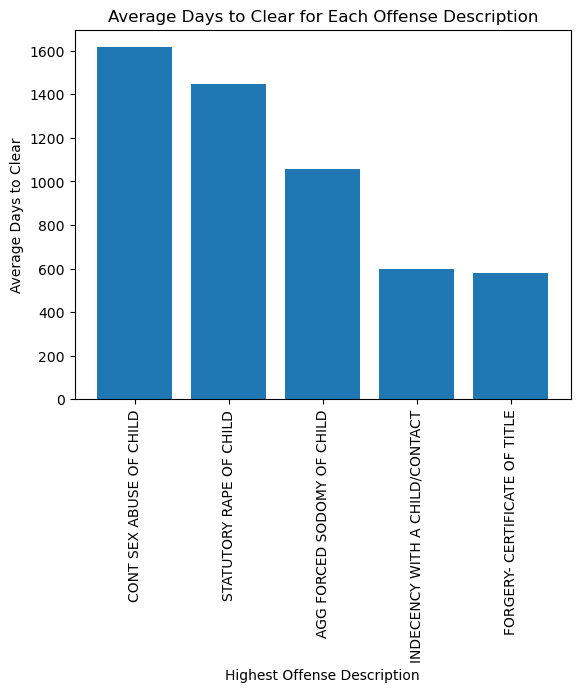

In [103]:
#plot the top 5 longest response times
plt.bar(top5.index, top5.values)
plt.xlabel('Highest Offense Description')
plt.ylabel('Average Days to Clear')
plt.title('Average Days to Clear for Each Offense Description')
plt.xticks(rotation=90)

#save graph
image_path = os.path.join('5longest')
plt.savefig(image_path)

plt.show()

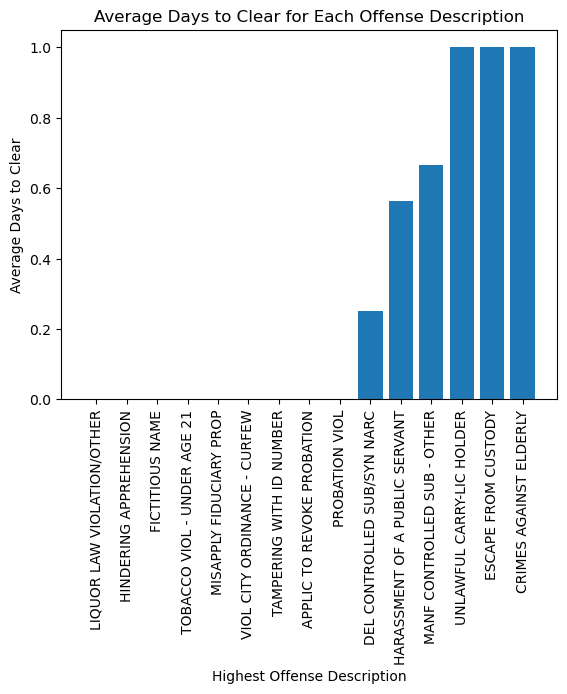

In [104]:
#plot the top 15 quickest response times
plt.bar(lowest5.index, lowest5.values)
plt.xlabel('Highest Offense Description')
plt.ylabel('Average Days to Clear')
plt.title('Average Days to Clear for Each Offense Description')
plt.xticks(rotation=90)

#save graph
image_path = os.path.join('15quickest')
plt.savefig(image_path)

plt.show()
